In [42]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_excel("C:\\My Stuff\\Internship\\Resolute AI\\Data\\Student dropout\\Merged.xlsx")
data.head(5)

,Residence_city,Socioeconomic_level,Civil_status,Age,State,Province,Vulnerable_group,Desired_program,Family_income,Father_level,Mother_level,STEM_subjects,H_subjects,Dropout
0,LOCAL,2,Married,36,LOCAL,LOCAL,2,UNSPECIFIED,1200000,HIGH SCHOOL,HIGH SCHOOL,46.7,51.5,YES
1,LOCAL,2,Unmarried,38,LOCAL,LOCAL,2,UNSPECIFIED,4500000,HIGH SCHOOL,HIGH SCHOOL,43.0,45.2,YES
2,LOCAL,2,Unmarried,33,LOCAL,NEIGHBOR,2,UNSPECIFIED,1800000,HIGH SCHOOL,UNDERGRADUATE,42.5,49.8,NO
3,LOCAL,3,Unmarried,27,LOCAL,LOCAL,2,UNSPECIFIED,5000000,HIGH SCHOOL,TECHNOLOGIST,45.9,42.1,YES
4,LOCAL,3,Unmarried,30,LOCAL,LOCAL,2,UNSPECIFIED,1500000,HIGH SCHOOL,HIGH SCHOOL,45.3,47.8,YES


In [3]:
data.columns

Index(['Residence_city', 'Socioeconomic_level', 'Civil_status', 'Age', 'State',
       'Province', 'Vulnerable_group', 'Desired_program', 'Family_income',
       'Father_level', 'Mother_level', 'STEM_subjects', 'H_subjects',
       'Dropout'],
      dtype='object')

## Exploratory data analysis 


In [4]:
data.shape

(548, 14)

In [5]:
duplicate = data[data.duplicated()]
duplicate

,Residence_city,Socioeconomic_level,Civil_status,Age,State,Province,Vulnerable_group,Desired_program,Family_income,Father_level,Mother_level,STEM_subjects,H_subjects,Dropout
321,LOCAL,1,Free union,30,LOCAL,NEIGHBOR,2,UNSPECIFIED,1000000,PRIMARY SCHOOL,PRIMARY SCHOOL,51.0,47.7,NO
339,LOCAL,4,Free union,31,LOCAL,LOCAL,2,UNSPECIFIED,3000000,UNDERGRADUATE,UNDERGRADUATE,55.6,53.7,NO
341,LOCAL,2,Married,26,LOCAL,LOCAL,2,INFORMATIC ENGINEERING,0,TECHNICAL,TECHNICAL,45.8,46.5,NO
423,LOCAL,2,Separated,48,LOCAL,LOCAL,2,UNSPECIFIED,2000000,PRIMARY SCHOOL,PRIMARY SCHOOL,46.0,52.7,YES
424,LOCAL,1,Free union,28,LOCAL,LOCAL,2,UNSPECIFIED,1000000,PRIMARY SCHOOL,PRIMARY SCHOOL,39.0,42.5,NO
462,LOCAL,1,Free union,36,LOCAL,LOCAL,1,UNSPECIFIED,2000000,PRIMARY SCHOOL,PRIMARY SCHOOL,46.8,51.0,YES
469,LOCAL,2,Married,36,LOCAL,LOCAL,2,UNSPECIFIED,1200000,HIGH SCHOOL,HIGH SCHOOL,46.7,51.5,YES
473,LOCAL,3,Free union,35,LOCAL,NEIGHBOR,2,UNSPECIFIED,3000000,TECHNICAL,TECHNOLOGIST,47.5,45.3,NO
495,LOCAL,4,Married,37,FOREIGN,FOREIGN,2,UNSPECIFIED,10500000,UNDERGRADUATE,TECHNOLOGIST,42.5,44.8,YES
496,LOCAL,3,Married,38,LOCAL,LOCAL,2,UNSPECIFIED,4000000,TECHNOLOGIST,HIGH SCHOOL,46.2,47.8,NO


In [6]:
data1 = data.drop_duplicates()

In [7]:
data1.shape

(537, 14)

In [8]:
data1.isnull().sum()

Residence_city         0
Socioeconomic_level    0
Civil_status           0
Age                    0
State                  0
Province               0
Vulnerable_group       0
Desired_program        0
Family_income          0
Father_level           0
Mother_level           0
STEM_subjects          0
H_subjects             0
Dropout                0
dtype: int64

In [9]:
data1.describe()

,Socioeconomic_level,Age,Vulnerable_group,Family_income,STEM_subjects,H_subjects
count,537.000000,537.000000,537.000000,5.370000e+02,537.000000,537.000000
mean,2.217877,26.793296,1.912477,1.983530e+06,49.157356,45.516946
std,0.986389,3.914681,0.462969,2.304186e+06,6.493558,6.604060
min,1.000000,10.000000,-1.000000,0.000000e+00,20.000000,20.000000
25%,1.000000,24.000000,2.000000,7.500000e+05,45.300000,41.300000
50%,2.000000,26.000000,2.000000,1.500000e+06,48.900000,45.200000
75%,3.000000,28.000000,2.000000,2.500000e+06,53.100000,50.000000
max,6.000000,48.000000,2.000000,2.800000e+07,67.600000,66.800000


<function matplotlib.pyplot.show(*args, **kw)>

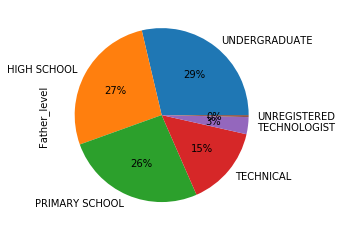

In [10]:
data1.Father_level.value_counts(normalize=True).plot.pie(autopct='%1.0f%%')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

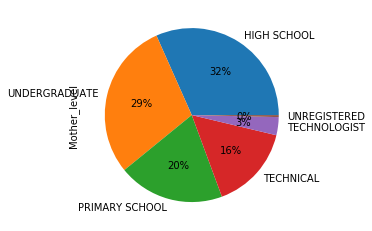

In [11]:
data1.Mother_level.value_counts(normalize=True).plot.pie(autopct='%1.0f%%')
plt.show

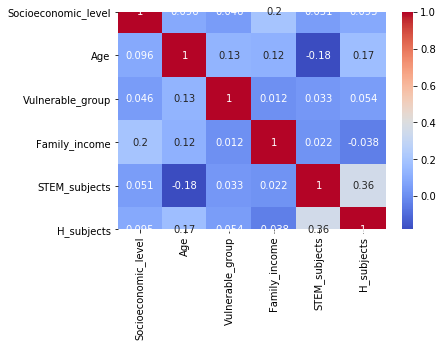

In [12]:
#studying correlation between the dataset variables
p = sns.heatmap(data1.corr(), annot = True, cmap = 'coolwarm')

There is no significant correlation between the variables.

NO     0.530726
YES    0.469274
Name: Dropout, dtype: float64

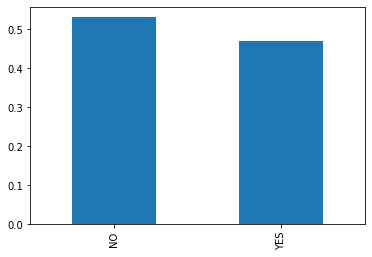

In [13]:
#target incidence
data1['Dropout'].value_counts(normalize=True).plot(kind='bar')
data1['Dropout'].value_counts(normalize=True)

53% of students did not dropout of university while 46.9% of students dropped out. Calculating the target incidence gives us that the data is fairly balanced.

In [14]:
data1.pivot_table(index=['Dropout'],values=data1[1:-1],aggfunc=np.mean)

,Age,Family_income,H_subjects,STEM_subjects,Socioeconomic_level,Vulnerable_group
Dropout,,,,,,
NO,26.592982,2.093981e+06,46.528421,50.694386,2.364912,1.929825
YES,27.019841,1.858615e+06,44.373016,47.419048,2.051587,1.892857


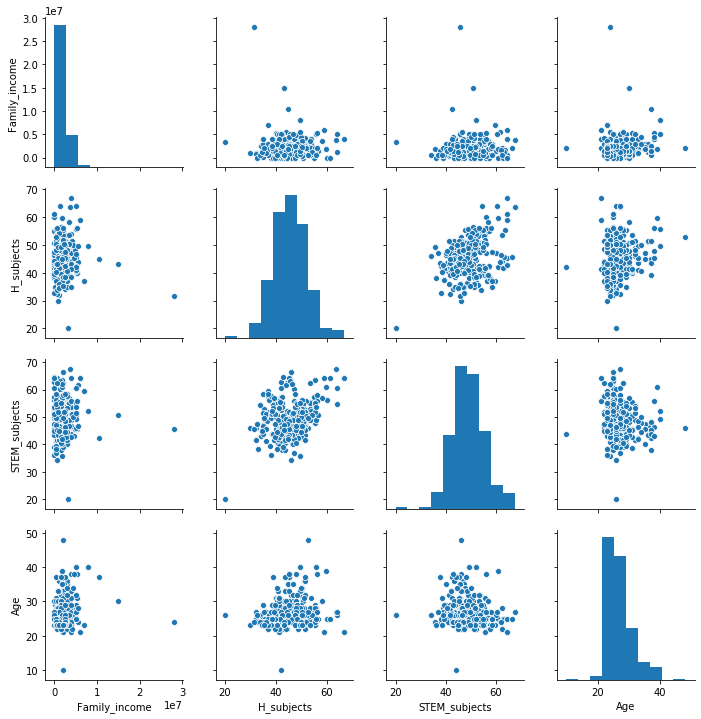

In [15]:
sns.pairplot(data=data1, vars=['Family_income','H_subjects','STEM_subjects','Age'])

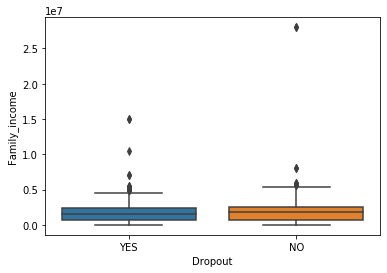

In [17]:
sns.boxplot(data1.Dropout,data1.Family_income)
plt.show()

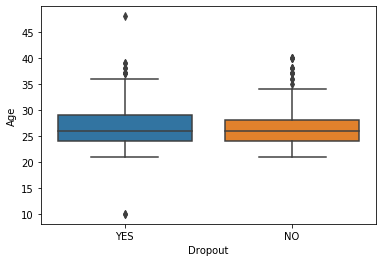

In [18]:
sns.boxplot(data1.Dropout,data1.Age)
plt.show()

The range of age for people dropping is more as compared to those who did not. The average age of people who drop out and people who do not is almost the same. 

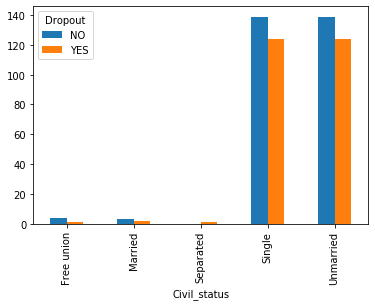

In [19]:
pd.crosstab(data1.Civil_status,data1.Dropout).plot(kind='bar')
plt.show()

Regardless of civil status excluding separated, more students have not dropped out.

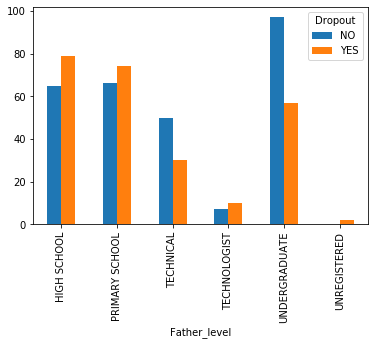

In [20]:
pd.crosstab(data1.Father_level,data1.Dropout).plot(kind='bar')
plt.show()

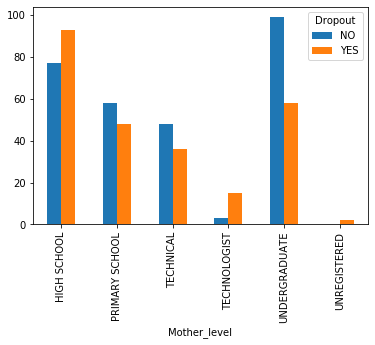

In [21]:
pd.crosstab(data1.Mother_level,data1.Dropout).plot(kind='bar')
plt.show()

It can be seen that when the mother and father education level is undergraduate then the students are less likely to dropout.

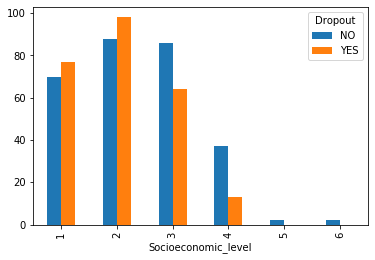

In [22]:
data1['Socioeconomic_level'].astype(str)
pd.crosstab(data1.Socioeconomic_level,data1.Dropout).plot(kind='bar')
plt.show()

Socioeconomic level 1 and 2 have more number of dropouts as compared to people who did not. 

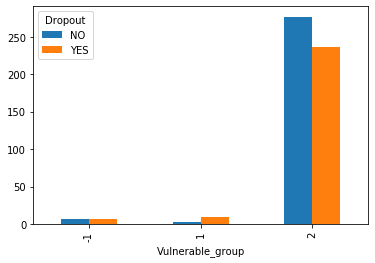

In [23]:
data1['Vulnerable_group'].astype(str)
pd.crosstab(data1.Vulnerable_group,data1.Dropout).plot(kind='bar')
plt.show()

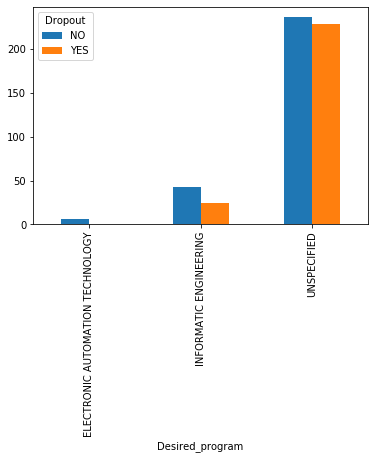

In [24]:
pd.crosstab(data1.Desired_program,data1.Dropout).plot(kind='bar')
plt.show()

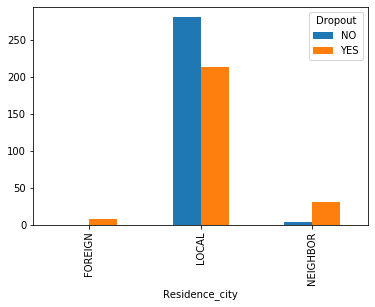

In [25]:
pd.crosstab(data1.Residence_city,data1.Dropout).plot(kind='bar')
plt.show()

People from Foreign and Neighbour Residence City are more likely to dropout.

## Modelling

In [27]:
data1.replace({"YES" : 1, "NO" : 0}, inplace = True)

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\frame.py:4263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [28]:
data1.head()

,Residence_city,Socioeconomic_level,Civil_status,Age,State,Province,Vulnerable_group,Desired_program,Family_income,Father_level,Mother_level,STEM_subjects,H_subjects,Dropout
0,LOCAL,2,Married,36,LOCAL,LOCAL,2,UNSPECIFIED,1200000,HIGH SCHOOL,HIGH SCHOOL,46.7,51.5,1
1,LOCAL,2,Unmarried,38,LOCAL,LOCAL,2,UNSPECIFIED,4500000,HIGH SCHOOL,HIGH SCHOOL,43.0,45.2,1
2,LOCAL,2,Unmarried,33,LOCAL,NEIGHBOR,2,UNSPECIFIED,1800000,HIGH SCHOOL,UNDERGRADUATE,42.5,49.8,0
3,LOCAL,3,Unmarried,27,LOCAL,LOCAL,2,UNSPECIFIED,5000000,HIGH SCHOOL,TECHNOLOGIST,45.9,42.1,1
4,LOCAL,3,Unmarried,30,LOCAL,LOCAL,2,UNSPECIFIED,1500000,HIGH SCHOOL,HIGH SCHOOL,45.3,47.8,1


In [44]:
data_obj1=data1.select_dtypes(include=object)
data_obj1.head(5)

,Residence_city,Civil_status,State,Province,Desired_program,Father_level,Mother_level
0,LOCAL,Married,LOCAL,LOCAL,UNSPECIFIED,HIGH SCHOOL,HIGH SCHOOL
1,LOCAL,Unmarried,LOCAL,LOCAL,UNSPECIFIED,HIGH SCHOOL,HIGH SCHOOL
2,LOCAL,Unmarried,LOCAL,NEIGHBOR,UNSPECIFIED,HIGH SCHOOL,UNDERGRADUATE
3,LOCAL,Unmarried,LOCAL,LOCAL,UNSPECIFIED,HIGH SCHOOL,TECHNOLOGIST
4,LOCAL,Unmarried,LOCAL,LOCAL,UNSPECIFIED,HIGH SCHOOL,HIGH SCHOOL


In [57]:
data_obj1.Civil_status.unique()

array(['Married', 'Unmarried', 'Free union', 'Separated', 'Single'],
      dtype=object)

In [58]:
data_obj1.Desired_program.unique()

array(['UNSPECIFIED', 'INFORMATIC ENGINEERING',
       'ELECTRONIC AUTOMATION TECHNOLOGY'], dtype=object)

In [45]:
data_obj1a=pd.get_dummies(data_obj1,drop_first=True)

In [46]:
data_num1=data1.select_dtypes(include=np.number)

In [47]:
final_df1=pd.concat([data_num1,data_obj1a],axis=1)

In [48]:
final_df1.head()

,Socioeconomic_level,Age,Vulnerable_group,Family_income,STEM_subjects,H_subjects,Dropout,Residence_city_LOCAL,Residence_city_NEIGHBOR,Civil_status_Married,...,Father_level_PRIMARY SCHOOL,Father_level_TECHNICAL,Father_level_TECHNOLOGIST,Father_level_UNDERGRADUATE,Father_level_UNREGISTERED,Mother_level_PRIMARY SCHOOL,Mother_level_TECHNICAL,Mother_level_TECHNOLOGIST,Mother_level_UNDERGRADUATE,Mother_level_UNREGISTERED
0,2,36,2,1200000,46.7,51.5,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,38,2,4500000,43.0,45.2,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,33,2,1800000,42.5,49.8,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,27,2,5000000,45.9,42.1,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,3,30,2,1500000,45.3,47.8,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
final_df1.columns

Index(['Socioeconomic_level', 'Age', 'Vulnerable_group', 'Family_income',
       'STEM_subjects', 'H_subjects', 'Dropout', 'Residence_city_LOCAL',
       'Residence_city_NEIGHBOR', 'Civil_status_Married',
       'Civil_status_Separated', 'Civil_status_Single',
       'Civil_status_Unmarried', 'State_LOCAL', 'State_NEIGHBOR',
       'Province_LOCAL', 'Province_NEIGHBOR',
       'Desired_program_INFORMATIC ENGINEERING', 'Desired_program_UNSPECIFIED',
       'Father_level_PRIMARY SCHOOL', 'Father_level_TECHNICAL',
       'Father_level_TECHNOLOGIST', 'Father_level_UNDERGRADUATE',
       'Father_level_UNREGISTERED', 'Mother_level_PRIMARY SCHOOL',
       'Mother_level_TECHNICAL', 'Mother_level_TECHNOLOGIST',
       'Mother_level_UNDERGRADUATE', 'Mother_level_UNREGISTERED'],
      dtype='object')

In [56]:
X1 = final_df1.drop(['Dropout'], axis = 1)
Y1 = final_df1['Dropout']
X1.columns

Index(['Socioeconomic_level', 'Age', 'Vulnerable_group', 'Family_income',
       'STEM_subjects', 'H_subjects', 'Residence_city_LOCAL',
       'Residence_city_NEIGHBOR', 'Civil_status_Married',
       'Civil_status_Separated', 'Civil_status_Single',
       'Civil_status_Unmarried', 'State_LOCAL', 'State_NEIGHBOR',
       'Province_LOCAL', 'Province_NEIGHBOR',
       'Desired_program_INFORMATIC ENGINEERING', 'Desired_program_UNSPECIFIED',
       'Father_level_PRIMARY SCHOOL', 'Father_level_TECHNICAL',
       'Father_level_TECHNOLOGIST', 'Father_level_UNDERGRADUATE',
       'Father_level_UNREGISTERED', 'Mother_level_PRIMARY SCHOOL',
       'Mother_level_TECHNICAL', 'Mother_level_TECHNOLOGIST',
       'Mother_level_UNDERGRADUATE', 'Mother_level_UNREGISTERED'],
      dtype='object')

In [50]:
xtrain,xtest,ytrain,ytest=train_test_split(X1,Y1,test_size=0.2)

In [51]:
rdc=RandomForestClassifier()

In [52]:
rdc1 = rdc.fit(xtrain,ytrain)

In [53]:
ypred=rdc.predict(xtest)

In [54]:
accuracy_score(ytest,ypred)

0.9629629629629629

In [55]:
import pickle
Dropout = 'finalized_model3.sav'
pickle.dump(rdc, open(Dropout, 'wb'))